In [40]:
import pandas as pd 
import seaborn as sns
import anndata
from pathlib import Path
import numpy as np
import umap

data_path = "/data/perturbation_bining_colon_stromal_take_5"

if not "adata" in globals():
    adata = anndata.read_h5ad(f"{data_path}/base_dataset.h5ad")
    base_df = adata.obs[["cell_type","tissue","sex","development_stage","disease"]].copy()
    genes = list(set([p.name.split("_")[2] for p in Path(data_path).glob("*0.embeddings.npz")]))
    base_embeddings = np.load("/data/perturbation_bining_colon_stromal_take_5_control/perturbation_experiment_GAPDH_level_1.0.embeddings.npz")["emb"]


In [29]:
base_df.groupby(["tissue", "disease"], observed=False).size().reset_index().pivot(index="tissue", columns="disease", values=0)

disease,Crohn disease,normal
tissue,,
colonic epithelium,10,0
caecum,512,771
colon,721,9466
transverse colon,0,1265
sigmoid colon,2306,0
lamina propria of mucosa of colon,7677,0
left colon,3955,325
right colon,7189,5236


In [41]:
relevant_tissues = ["right colon", "caecum"]
base_df.query(f"tissue == {relevant_tissues}").groupby(["cell_type", "disease"], observed=True).size().reset_index().pivot(index="cell_type", columns="disease", values=0)

disease,Crohn disease,normal
cell_type,,
fibroblast,4877,4292
endothelial cell,1489,891
glial cell,346,492
myofibroblast cell,689,233
stromal cell,76,7
lymphocyte,70,12
pericyte,154,80


<Axes: xlabel='umap_x', ylabel='umap_y'>

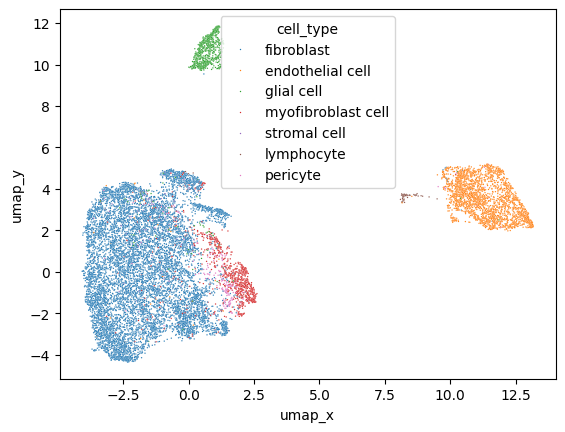

In [49]:
relevant_tissues = ["right colon", "caecum"]
filename = "stromal_cells_umap_right_colon_and_caecum_df.parquet"

try:
    stromal_cells_umap_right_colon_and_caecum_df = pd.read_parquet(filename)
except:
    stromal_cells_umap_right_colon_and_caecum_df = base_df.reset_index().query(f"tissue == {relevant_tissues}").copy()
    emebddings = base_embeddings[stromal_cells_umap_right_colon_and_caecum_df.index]
    stromal_cells_umap_right_colon_and_caecum_df[["umap_x","umap_y"]] = umap.UMAP().fit_transform(emebddings)
    stromal_cells_umap_right_colon_and_caecum_df.to_parquet(filename)
    stromal_cells_umap_right_colon_and_caecum_df
df = stromal_cells_umap_right_colon_and_caecum_df
sns.scatterplot(df, x="umap_x", y="umap_y", hue="cell_type", s=1)